In [1]:
import yfinance as yf
import numpy as np

# Download stock data
ticker = 'AMBUJACEM.BO'  
data = yf.download(ticker, start='2020-01-01')

print(data.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2020-01-01  197.399994  197.699997  196.000000  196.850006  175.912598   71954
2020-01-02  197.300003  206.500000  197.300003  205.399994  183.553192  451248
2020-01-03  205.500000  205.600006  202.449997  203.399994  181.765915   69640
2020-01-06  201.000000  202.149994  196.350006  196.850006  175.912598   82570
2020-01-07  202.800003  202.899994  196.649994  199.100006  177.923264  170367


In [2]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()

# Calculate Exponential Moving Average
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
data.head(30)

,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20
Date,,,,,,,,
2020-01-01,197.399994,197.699997,196.000000,196.850006,175.912598,71954,NaN,196.850006
2020-01-02,197.300003,206.500000,197.300003,205.399994,183.553192,451248,NaN,197.664291
2020-01-03,205.500000,205.600006,202.449997,203.399994,181.765915,69640,NaN,198.210548
2020-01-06,201.000000,202.149994,196.350006,196.850006,175.912598,82570,NaN,198.080973
2020-01-07,202.800003,202.899994,196.649994,199.100006,177.923264,170367,NaN,198.178023
2020-01-08,197.699997,204.500000,195.649994,201.649994,180.202026,310791,NaN,198.508687
2020-01-09,204.500000,209.250000,204.000000,207.949997,185.831940,356560,NaN,199.407860
2020-01-10,208.100006,213.899994,206.899994,211.649994,189.138412,210546,NaN,200.573777
2020-01-13,212.000000,214.350006,210.600006,211.449997,188.959702,147522,NaN,201.609608


In [3]:
def aroon(data, window):
    df = data.copy()
    df['Aroon Up'] = df['Close'].rolling(window).apply(lambda x: (window - np.argmax(x[::-1])) / window * 100, raw=False)
    df['Aroon Down'] = df['Close'].rolling(window).apply(lambda x: (window - np.argmin(x[::-1])) / window * 100, raw=False)
    return df

# Calculate Aroon Indicator with a window of 25 periods
window = 25
aroon_data = aroon(data, window)

print(aroon_data.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-29  688.049988  693.450012  670.500000  679.599976  679.599976   
2024-07-30  684.000000  684.000000  670.900024  674.450012  674.450012   
2024-07-31  681.799988  686.500000  672.150024  679.750000  679.750000   
2024-08-01  680.000000  680.950012  655.650024  663.950012  663.950012   
2024-08-02  662.950012  663.000000  648.650024  650.849976  650.849976   

            Volume      SMA_20      EMA_20  Aroon Up  Aroon Down  
Date                                                              
2024-07-29   79350  683.252502  678.299558      24.0         8.0  
2024-07-30   44416  682.240002  677.932935      20.0         4.0  
2024-07-31  228113  681.640002  678.105988      16.0         4.0  
2024-08-01  152860  680.215002  676.757800      12.0         4.0  
2024-08-02  103796  678.692502  674.290388       8.0       100.0  


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


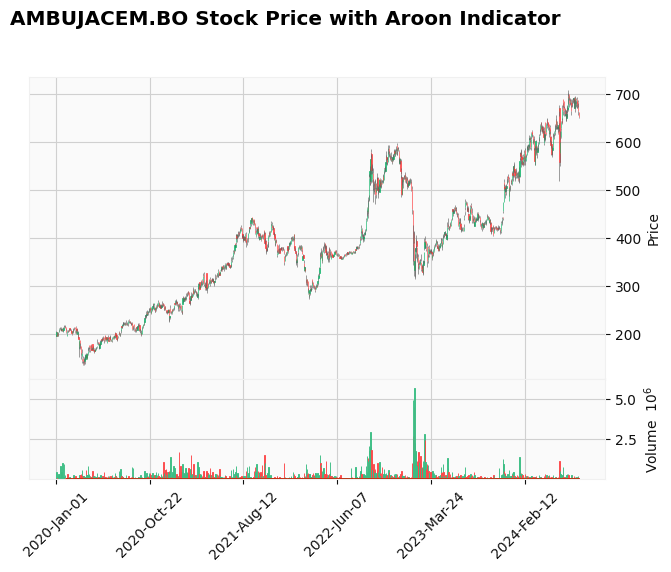

In [4]:
# Merge Aroon data with the original data
import mplfinance as mpf
import matplotlib.pyplot as plt
data['Aroon Up'] = aroon_data['Aroon Up']
data['Aroon Down'] = aroon_data['Aroon Down']

# Define additional plots for Aroon indicators
apds = [
    mpf.make_addplot(data['Aroon Up'], panel=1, color='green', secondary_y=False, ylabel='Aroon Up/Down'),
    mpf.make_addplot(data['Aroon Down'], panel=1, color='red', secondary_y=False)
]

# Plot candlestick chart with additional indicators
mpf.plot(data, type='candle', addplot=apds, volume=True, title=f'{ticker} Stock Price with Aroon Indicator', style='yahoo', panel_ratios=(3, 1))

# Display the plot
plt.show()

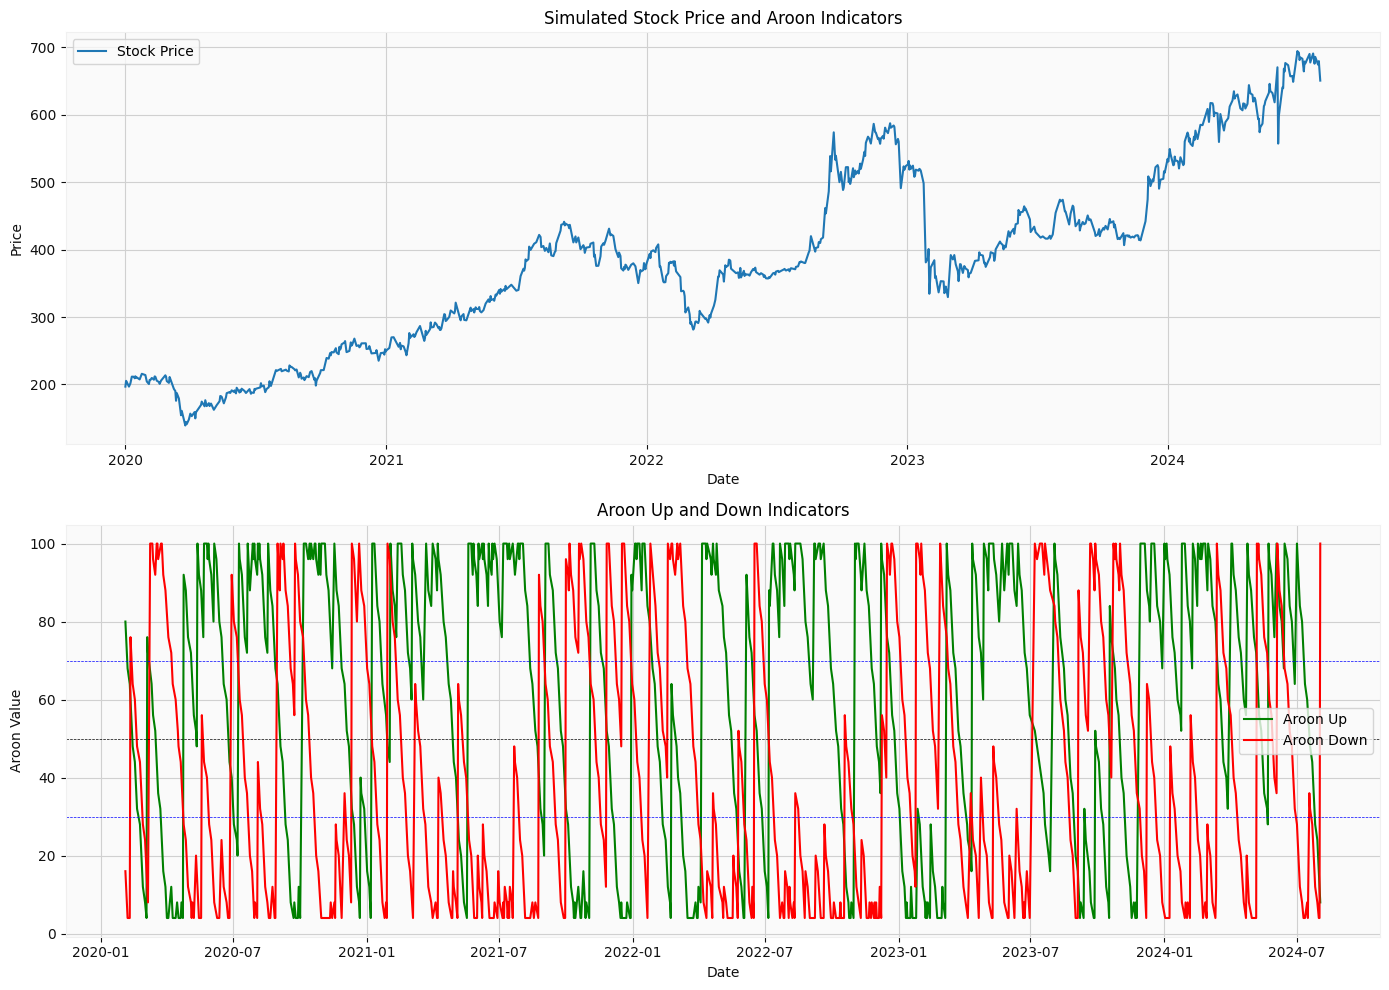

In [5]:
plt.figure(figsize=(14, 10))

# Subplot 1: Stock Price
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Stock Price')
plt.title('Simulated Stock Price and Aroon Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Subplot 2: Aroon Indicators
plt.subplot(2, 1, 2)
plt.plot(aroon_data['Aroon Up'], label='Aroon Up', color='green')
plt.plot(aroon_data['Aroon Down'], label='Aroon Down', color='red')
plt.axhline(50, color='black', linestyle='--', linewidth=0.5)
plt.axhline(70, color='blue', linestyle='--', linewidth=0.5)
plt.axhline(30, color='blue', linestyle='--', linewidth=0.5)
plt.title('Aroon Up and Down Indicators')
plt.xlabel('Date')
plt.ylabel('Aroon Value')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [6]:
def wma(series, period):
    weights = list(range(1, period + 1))
    return series.rolling(period).apply(lambda prices: (prices * weights).sum() / sum(weights), raw=True)

def wavetrend(data, short_period, long_period, signal_period):
    df = data.copy()
    df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['WT'] = wma(wma(df['TP'], short_period), long_period)
    df['WT Signal'] = df['WT'].rolling(signal_period).mean()
    df['Wave Momentum'] = df['WT'] - df['WT Signal']
    return df

# Calculate WaveTrend Indicator
short_period = 10
long_period = 21
signal_period = 4
wavetrend_data = wavetrend(data, short_period, long_period, signal_period)

print(wavetrend_data.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-29  688.049988  693.450012  670.500000  679.599976  679.599976   
2024-07-30  684.000000  684.000000  670.900024  674.450012  674.450012   
2024-07-31  681.799988  686.500000  672.150024  679.750000  679.750000   
2024-08-01  680.000000  680.950012  655.650024  663.950012  663.950012   
2024-08-02  662.950012  663.000000  648.650024  650.849976  650.849976   

            Volume      SMA_20      EMA_20  Aroon Up  Aroon Down          TP  \
Date                                                                           
2024-07-29   79350  683.252502  678.299558      24.0         8.0  681.183329   
2024-07-30   44416  682.240002  677.932935      20.0         4.0  676.450012   
2024-07-31  228113  681.640002  678.105988      16.0         4.0  679.466675   
2024-08-01  152860  680.215002  676.757800      12.0         4.0  666.850016   
2

In [7]:
def bollinger_bands(df, window=20, no_of_std=2):
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()
    df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
    df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
    return df

data = bollinger_bands(data)

In [10]:
data.tail(15)

,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,Aroon Up,Aroon Down,Bollinger High,Bollinger Low
Date,,,,,,,,,,,,
2024-07-12,680.500000,682.500000,673.700012,676.299988,676.299988,115383,672.702502,669.467741,64.0,4.0,699.421501,645.983504
2024-07-15,684.049988,690.349976,681.650024,683.900024,683.900024,107210,673.050003,670.842244,60.0,8.0,700.179231,645.920776
2024-07-16,686.049988,691.799988,683.500000,685.200012,685.200012,77921,673.625003,672.209650,56.0,4.0,701.294343,645.955663
2024-07-18,689.950012,692.500000,679.000000,690.400024,690.400024,103505,674.815005,673.942067,52.0,36.0,703.248833,646.381178
2024-07-19,690.049988,691.950012,670.400024,677.700012,677.700012,178965,675.742505,674.299966,48.0,32.0,703.218882,648.266128
2024-07-22,670.250000,688.900024,670.250000,686.599976,686.599976,57974,677.210004,675.471396,44.0,28.0,703.643075,650.776932
2024-07-23,686.650024,694.849976,662.799988,691.099976,691.099976,126629,678.880002,676.959832,40.0,24.0,704.324981,653.435022
2024-07-24,693.000000,693.250000,680.150024,682.400024,682.400024,39826,680.547504,677.477946,36.0,20.0,701.784625,659.310382
2024-07-25,678.349976,684.450012,672.400024,675.950012,675.950012,79073,681.500003,677.332428,32.0,16.0,699.773431,663.226575


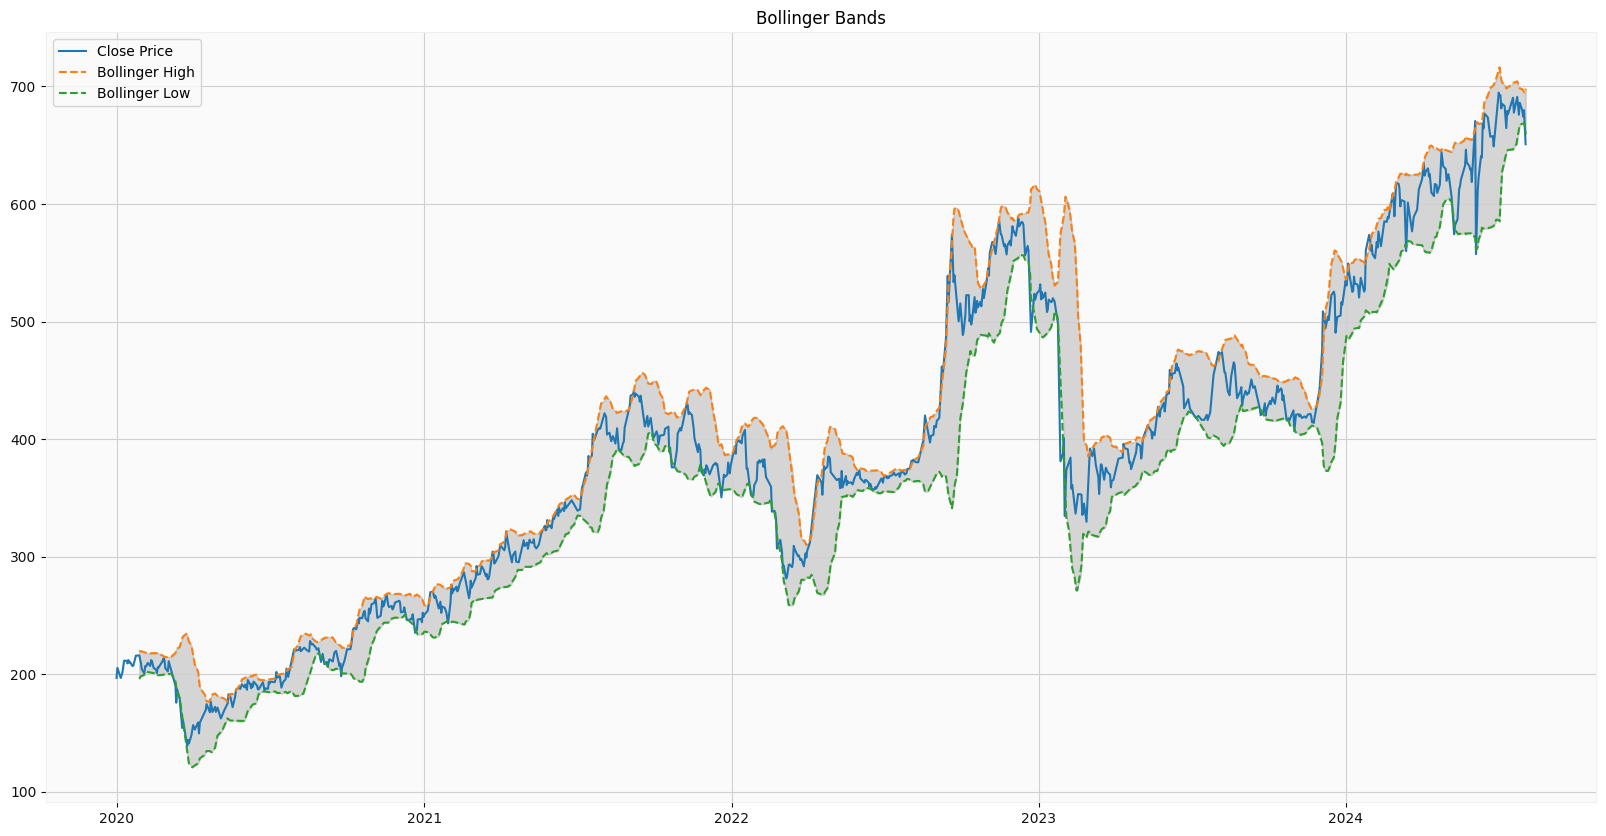

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Bollinger High'], label='Bollinger High', linestyle='--')
plt.plot(data['Bollinger Low'], label='Bollinger Low', linestyle='--')
plt.fill_between(data.index, data['Bollinger High'], data['Bollinger Low'], color='grey', alpha=0.3)
plt.title('Bollinger Bands')
plt.legend()
plt.show()